<a href="https://colab.research.google.com/github/ctrl-shift-C-V/INCS870/blob/main/Malware%20detector%20exploration%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making a Malware Predictor

In [181]:
#-- Importing liberaries --#

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Data Cleaning and Exploration

In [182]:
#-- Importing the dataset --#
df_raw = pd.read_csv('/content/dataset.csv')

In [183]:
df_raw['label'].value_counts()

,count
label,
benign,20000
malicious,19006


In [184]:
df_raw['type'].value_counts()

,count
type,
pe,28813
elf,10193


In [185]:
df_raw['result'] = df_raw['label'].apply(lambda x: 1 if x == 'malicious' else 0) # benign: 0, malicious: 1

In [186]:
#-- Inpecting the column names --#
df_raw.head(10)

,hash,type,label,size,section_count,entropy,imported_mod_count,api_count,result
0,0002fda1d48a57a259ef4a8d76f756a0,elf,benign,23257,29,3.521,0,0,0
1,00030b8f3a3926b65a67c70989085e2f,elf,benign,5053,35,1.654,0,0,0
2,000a639c89688ddfc06ba52db74647a8,elf,benign,5053,35,1.653,0,0,0
3,000cbf0ce8182ca77e77989dc85652f7,elf,benign,287633,40,4.478,0,0,0
4,000f3a31e9fd94f7a78f839330a0f949,elf,benign,5113,36,1.723,0,0,0
5,0017a1cde9c7a8886856d2eac49d02ed,elf,benign,1056,34,1.916,0,0,0
6,0018dea3b0567541acc7471e756c05a9,elf,benign,150733,39,3.266,0,0,0
7,0022657b19e20aedc19341fa81507071,elf,benign,5041,37,1.667,0,0,0
8,0023b88b78308cf45db0e35c500a6eed,elf,benign,18489,39,3.961,0,0,0
9,00242f02dd418cddf01c3b31b11df798,elf,benign,5937,30,1.461,0,0,0


In [187]:
#-- Getting descriptive statistics --#
df_raw.describe()

,size,section_count,entropy,imported_mod_count,api_count,result
count,3.900600e+04,39006.000000,39006.000000,39006.000000,39006.000000,39006.000000
mean,7.954848e+05,13.730067,4.279257,4.171845,66.345178,0.487258
std,5.183283e+06,13.842138,1.447267,4.717327,84.606834,0.499844
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.457600e+04,5.000000,3.574000,0.000000,0.000000,0.000000
50%,9.420800e+04,6.000000,4.319000,4.000000,63.000000,0.000000
75%,3.194472e+05,28.000000,4.951000,6.000000,89.000000,1.000000
max,4.001300e+08,245.000000,7.593000,90.000000,3329.000000,1.000000


In [188]:
#-- Now dropping all of the rows with null or missing values --#
df_raw.dropna()

,hash,type,label,size,section_count,entropy,imported_mod_count,api_count,result
0,0002fda1d48a57a259ef4a8d76f756a0,elf,benign,23257,29,3.521,0,0,0
1,00030b8f3a3926b65a67c70989085e2f,elf,benign,5053,35,1.654,0,0,0
2,000a639c89688ddfc06ba52db74647a8,elf,benign,5053,35,1.653,0,0,0
3,000cbf0ce8182ca77e77989dc85652f7,elf,benign,287633,40,4.478,0,0,0
4,000f3a31e9fd94f7a78f839330a0f949,elf,benign,5113,36,1.723,0,0,0
...,...,...,...,...,...,...,...,...,...
39001,4f1909a97519de5763f1c2b448df4aba,pe,benign,139264,10,1.577,4,65,0
39002,4f1a5c686336713c5b7168e33b402ce5,pe,benign,36864,6,4.005,10,62,0
39003,4f1c64bc57e1ec3ccd89f503ef5d7277,pe,benign,36864,5,4.620,9,60,0
39004,4f1e446b3cb96b1bcb895b9f4e085fb8,pe,benign,118784,5,4.468,2,70,0


In [189]:
#-- Loop through each column and calculate percentage of missing rows --#
for column in df_raw.columns:
    missing_count = df_raw[column].isnull().sum()
    missing_percentage = missing_count / len(df_raw) * 100
    print(f"Column '{column}' has {missing_count} missing rows ({missing_percentage:.2f}%)")

Column 'hash' has 0 missing rows (0.00%)
Column 'type' has 0 missing rows (0.00%)
Column 'label' has 0 missing rows (0.00%)
Column 'size' has 0 missing rows (0.00%)
Column 'section_count' has 0 missing rows (0.00%)
Column 'entropy' has 0 missing rows (0.00%)
Column 'imported_mod_count' has 0 missing rows (0.00%)
Column 'api_count' has 0 missing rows (0.00%)
Column 'result' has 0 missing rows (0.00%)


In [190]:
#-- Get the data types of each column --#
dtypes = df_raw.dtypes

#-- Print the data types --#
print(dtypes)

hash                   object
type                   object
label                  object
size                    int64
section_count           int64
entropy               float64
imported_mod_count      int64
api_count               int64
result                  int64
dtype: object


Now converting categorical variables to numeric with LabelEncoder()

In [191]:
df_raw['hash'].nunique()

39006

# Step 2: Variable Exploration via Visualization

The Pearson correlation matrix illustrates the relationships between variables, including the target variable. When two variables have a high correlation, it indicates a mathematical relationship between them, making it reasonable to consider removing one to avoid redundancy.

For this project, a correlation threshold of 70% (positive or negative) is used. As shown in the graph below, none of the variable has more than 70% (positive or negative) correlation with the target result



<Axes: title={'center': 'Pearson Correlation of Feature Variables'}>

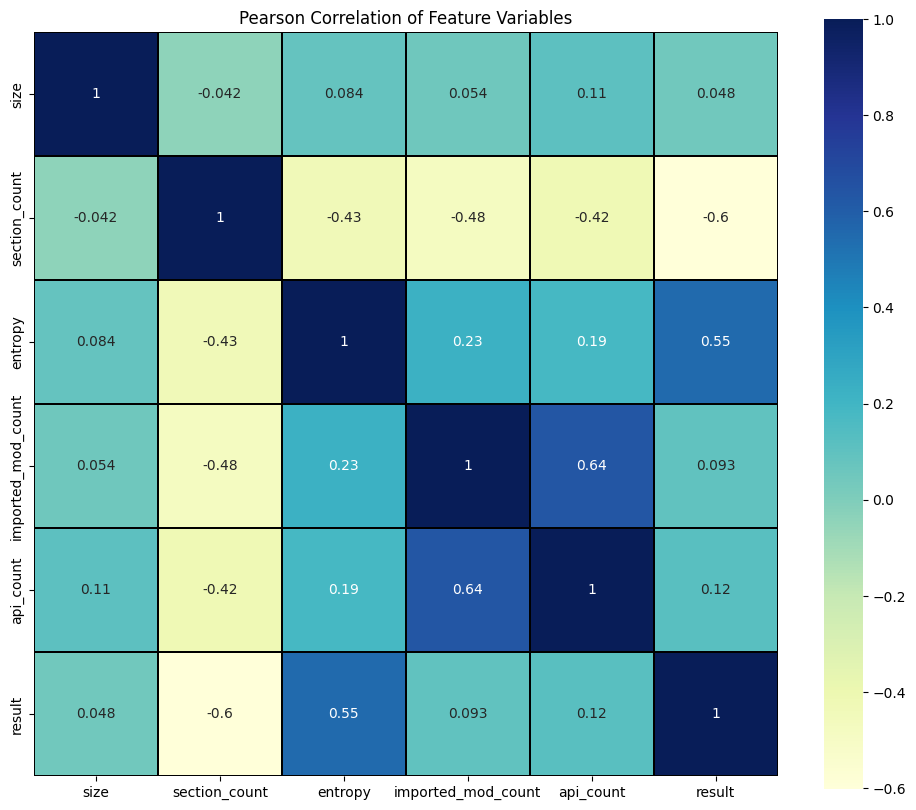

In [192]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Feature Variables')

# Draw the heatmap using seaborn
sns.heatmap(df_raw.drop(columns=["hash", "label", "type"]).astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [194]:
#-- Creating a list of column names to drop --#
columns_to_drop = ['hash', 'type','label'] # removing unused variables

#-- Drop the columns using list comprehension to the final converted dataset --#
df = df_raw.drop(columns=columns_to_drop)

In [195]:
df.head(10)

,size,section_count,entropy,imported_mod_count,api_count,result
0,23257,29,3.521,0,0,0
1,5053,35,1.654,0,0,0
2,5053,35,1.653,0,0,0
3,287633,40,4.478,0,0,0
4,5113,36,1.723,0,0,0
5,1056,34,1.916,0,0,0
6,150733,39,3.266,0,0,0
7,5041,37,1.667,0,0,0
8,18489,39,3.961,0,0,0
9,5937,30,1.461,0,0,0



# Step 3: Univariate visualization exploration

Visualizing the distribution of each variable helps understand its underlying statistical nature (e.g., Gaussian, skewed, or bimodal).
For example, it helps determine if variables follow a normal distribution or are non-parametric. If most variables are not normal distribution, then non-parametric model (e.g. decision tree), non-parametric models, meaning they do not make any assumptions about the underlying distribution of the data, is more align for this project.

<Axes: xlabel='size', ylabel='Density'>

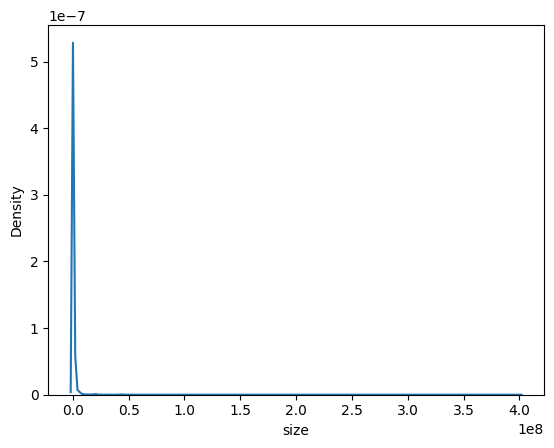

In [196]:
#-- Plotting the distrobtion of 'size' --#
sns.kdeplot(df['size'])

<Axes: xlabel='section_count', ylabel='Density'>

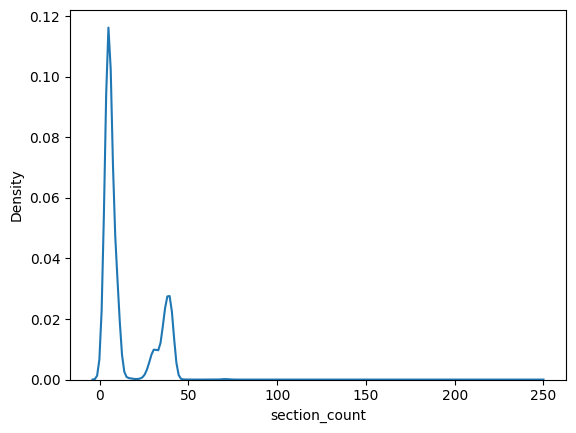

In [197]:
sns.kdeplot(df['section_count'])

<Axes: xlabel='entropy', ylabel='Density'>

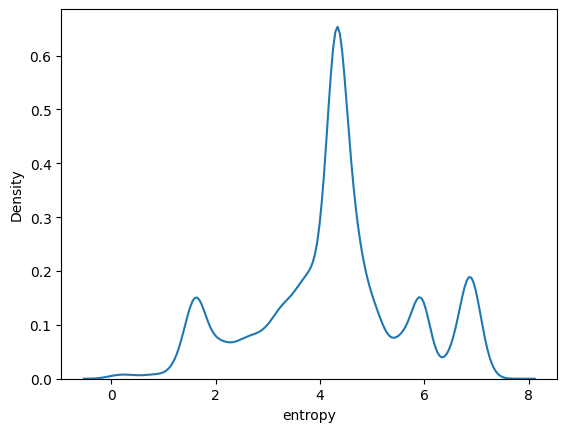

In [198]:
sns.kdeplot(df['entropy'])

<Axes: xlabel='imported_mod_count', ylabel='Density'>

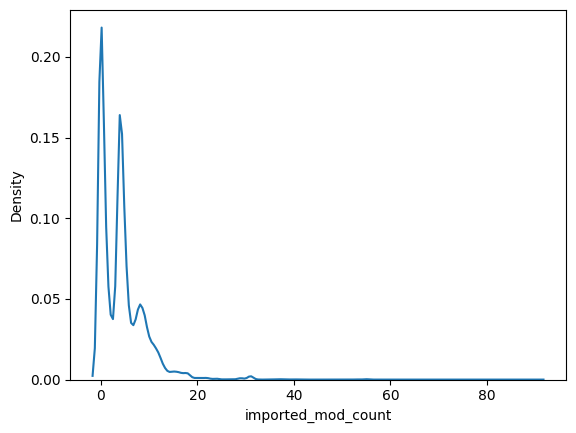

In [200]:
sns.kdeplot(df['imported_mod_count'])

<Axes: xlabel='api_count', ylabel='Density'>

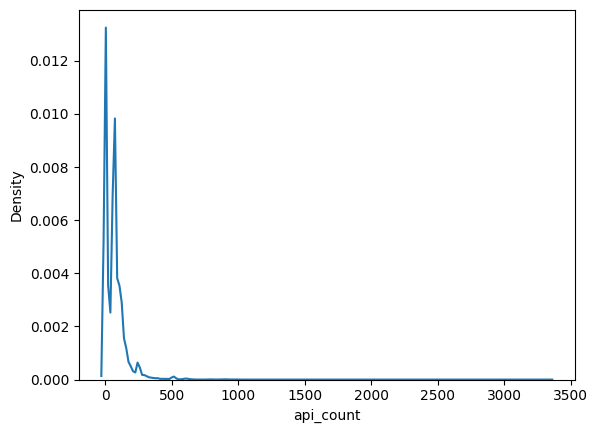

In [201]:
sns.kdeplot(df['api_count'])

From the visualizations, most variables is not following gaussian distribution. Then non-parametric models is much fitter for this dataset, so it's unnecessary to normalize the dataset


# Step 4: Creating the Random Forrest model.


In [203]:
df

,size,entropy,imported_mod_count,result
0,23257,3.521,0,0
1,5053,1.654,0,0
2,5053,1.653,0,0
3,287633,4.478,0,0
4,5113,1.723,0,0
...,...,...,...,...
39001,139264,1.577,4,0
39002,36864,4.005,10,0
39003,36864,4.620,9,0
39004,118784,4.468,2,0


# Now running Random Forrest Regressor to predict "label"

In [204]:
#-- Sperating the dataframe into two 'X' = all variables minus the target variable --#
#-- 'y' is the target variable --#
X = df.drop('result', axis=1)  # Features
y = df['result']  # Target variable

In [211]:
#-- Splitting the two datasets in 4 sets. Reserving 20% for testing 80% for training --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
#-- Instanitating the model --#
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, #5
    min_samples_split=10, #30
    min_samples_leaf=5, #15
    max_features='sqrt',
    random_state=42)

In [223]:
#-- Fitting the model to the training data --#
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [224]:
#-- Generating model predictions on the test set --#
predictions = model.predict(X_test)

# Step 5:  Model Evaluation


In [232]:
y_pred = model.predict(X_test)

In [233]:
#-- Calling evaluation metrics for model scoring --#
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9524480902332735


The model achieved an accuracy of 95.24%, indicating that it correctly predicted the target variable for 95.24% of the test dataset. This high accuracy suggests that the model is highly effective at distinguishing between classes and generalizes well to unseen data.

Further analysis, such as examining a confusion matrix or additional metrics like precision, recall, and F1-score, can provide deeper insights into the model's performance and robustness.


In [235]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

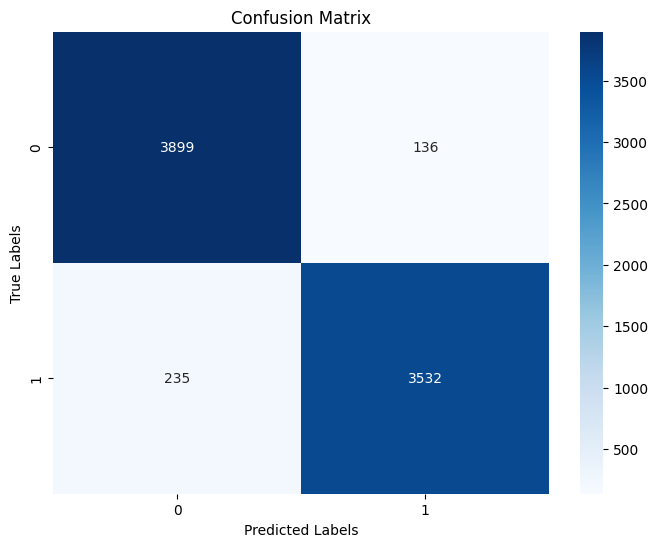

Classification Metrics:
Accuracy: 0.9524
Precision: 0.9527
Recall: 0.9524
F1-Score: 0.9524

Classification Report:
              precision    recall  f1-score   support

      benign       0.94      0.97      0.95      4035
   malicious       0.96      0.94      0.95      3767

    accuracy                           0.95      7802
   macro avg       0.95      0.95      0.95      7802
weighted avg       0.95      0.95      0.95      7802



In [238]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute classification metrics
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Weighted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Weighted for multiclass
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and display a detailed classification report
report = classification_report(y_test, y_pred, target_names=['benign', 'malicious'])
print("\nClassification Report:")
print(report)

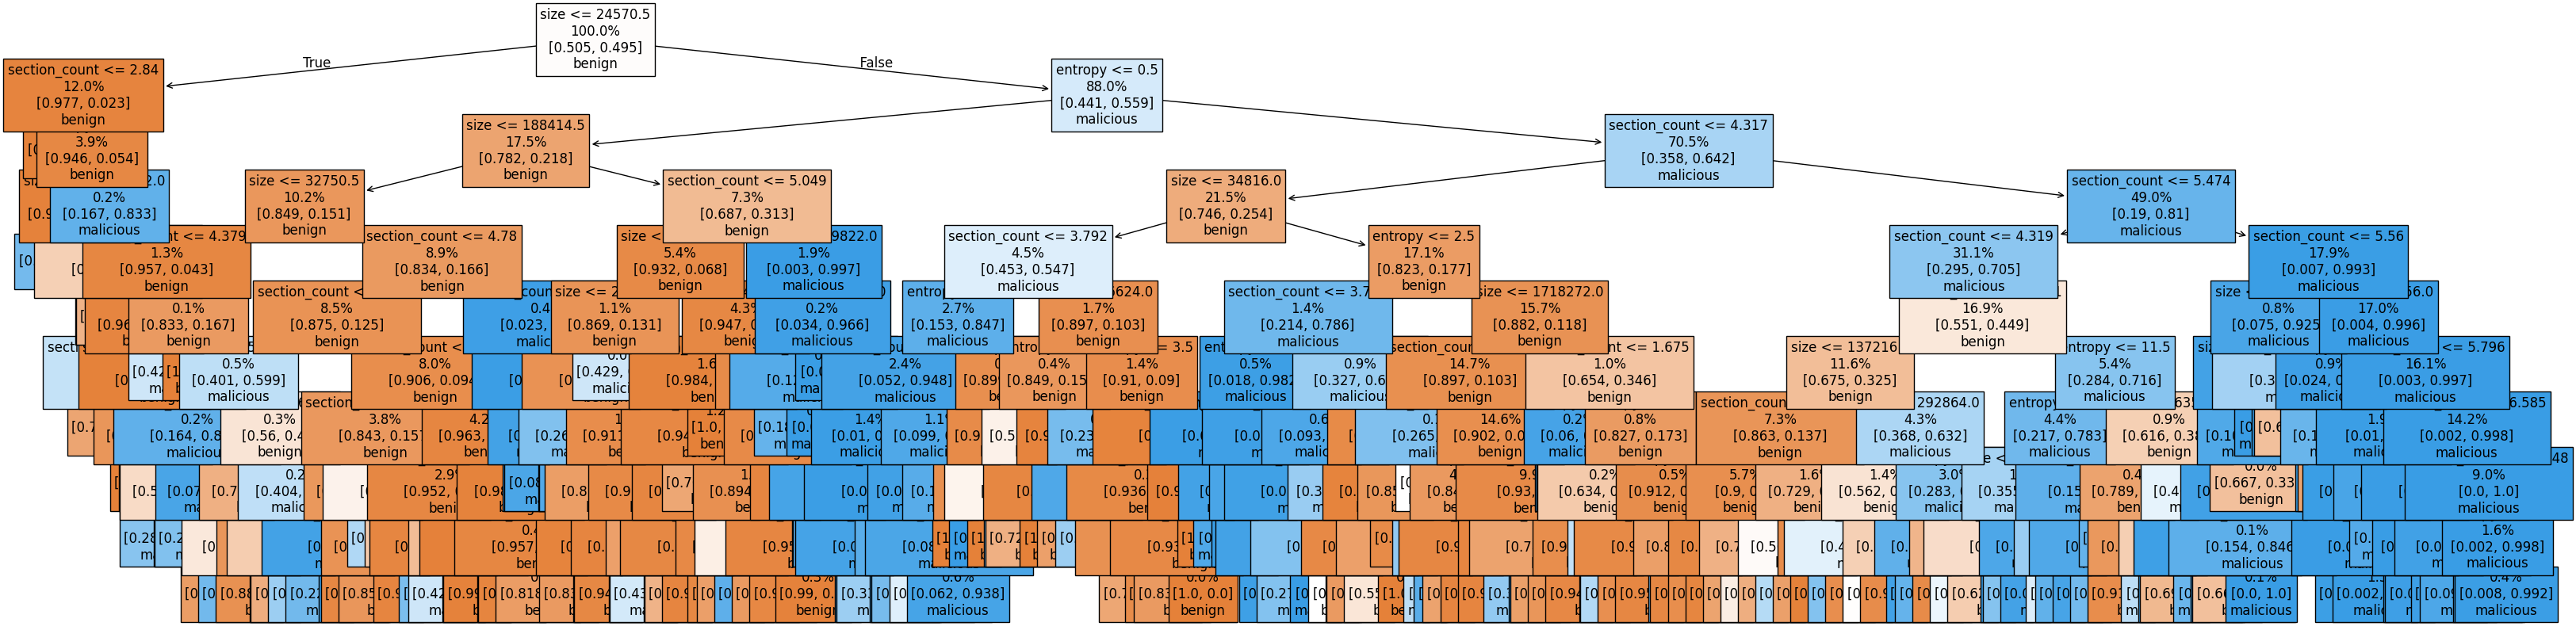

In [239]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 10))
plot_tree(model.estimators_[0],
          feature_names=['size','section_count','entropy','imported_mod_count','api_count'],
          filled=True,
          fontsize=12,
          impurity=False,
          label='none',
          proportion=True,
          class_names=['benign', 'malicious'])
plt.show()

# Step 6: Summarize the Findings

Detect Malware with 95% accuracy using a Random Forrest.

The classification report above provides an evaluation of the model's performance on predicting two classes: benign and malicious. The overall accuracy of the model is 95.24%, indicating that it correctly classified 95.24% of the samples in the test dataset.

For the benign class, the precision is 94%, meaning 94% of the instances predicted as benign were correct. Its recall is 97%, which measures the proportion of actual benign samples correctly identified by the model. This results in an F1-score of 95%, a metric that balances precision and recall. Recall is particularly important in identifying as many relevant positive cases as possible, ensuring the model effectively minimizes missed positives (false negatives).

For the malicious class, the precision is 96%, indicating the model correctly predicted 96% of malicious instances. Its recall is 94%, showing it identified 94% of all actual malicious samples, leading to an F1-score of 95%.

The high F1-scores for both classes, combined with the overall accuracy, demonstrate the model's reliability and effectiveness for this binary classification task.

